**THE SPARKS FOUNDATION**

**TASK 2: PREDICTION USING UNSUPERVISED ML**

Objective: To predict the optimum number of clusters in Iris dataset and represent it visually.

Author: **RHYTHM RASTOGI**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.shape # to check the dimensions of the data 

(150, 4)

In [ ]:
data.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Finding the optimum number of clusters for K-means**

In [ ]:
# Finding the optimum number of clusters for k-means classification
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []   # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

**Plotting the line graph to visualize the curve.**

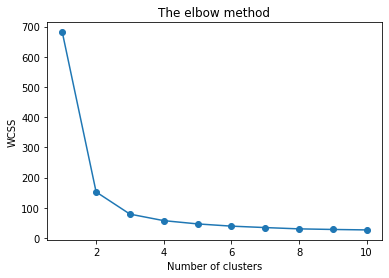

In [ ]:
plt.plot(range(1, 11), wcss,marker ='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The elbow method is used to find the value of k i.e.,the optimum clusters is where the elbow occurs.This happens when WCSS (within cluster sum of squares)do not decrease significantly with every iteration.

From this graph we can take the number of clusters as **3**

**Creating K-Means Classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeans_y = kmeans.fit_predict(x)

**Visualization of the cluster data**

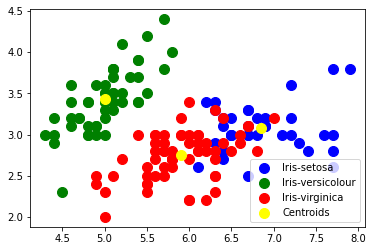

In [ ]:
# Visualizing preferably on the first two columns
plt.scatter(x[kmeans_y == 0, 0], x[kmeans_y == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[kmeans_y == 1, 0], x[kmeans_y == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[kmeans_y == 2, 0], x[kmeans_y == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the above clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()